In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
df=pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [31]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [33]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [38]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [41]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [42]:
X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Age_median']=X_train['Age'].fillna(median_age)

X_train['Fare_median']=X_train['Fare'].fillna(median_fare)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)

In [43]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_median,Fare_mean
189,36.0,7.8958,0,36.000000,36.0,7.8958,7.8958
453,49.0,89.1042,1,49.000000,49.0,89.1042,89.1042
555,62.0,26.5500,0,62.000000,62.0,26.5500,26.5500
128,NaN,22.3583,2,29.498846,28.0,22.3583,22.3583
548,33.0,20.5250,2,33.000000,33.0,20.5250,20.5250


In [45]:
print('orginal age variable variance',X_train['Age'].var())
print(X_train['Age_mean'].var())
print(X_train['Age_median'].var())

print(X_train['Fare'].var())
print(X_train['Fare_mean'].var())
print(X_train['Fare_median'].var())

orginal age variable variance 210.2517072477435
168.85193366872227
169.20731007048155
2761.0314349486343
2621.232374951235
2637.012481677765


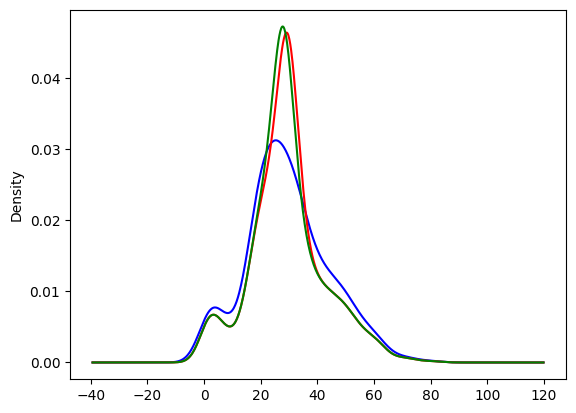

In [48]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax,color='blue')
X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Age_median'].plot(kind='kde',ax=ax,color='green')
plt.show()

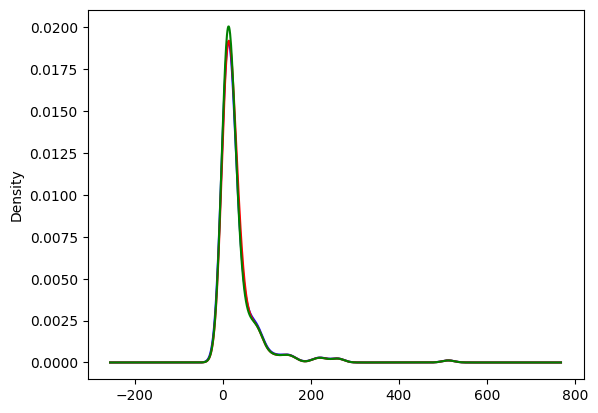

In [50]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Fare'].plot(kind='kde',ax=ax,color='blue')
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Fare_median'].plot(kind='kde',ax=ax,color='green')
plt.show()

In [51]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.672035,17.657433
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,59.728510,60.700688
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375


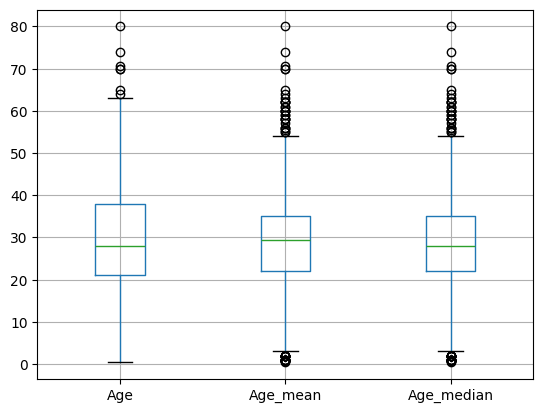

In [52]:
X_train[['Age','Age_mean','Age_median']].boxplot()
plt.show()

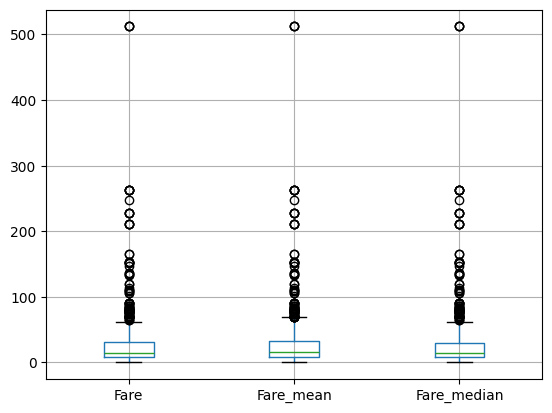

In [53]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()
plt.show()

In [61]:
im1=SimpleImputer(strategy='median')
im2=SimpleImputer(strategy='mean')



In [62]:
trf=ColumnTransformer([
    ('im1',im1,['Age']),
    ('im2',im2,['Fare'])
],remainder='passthrough')

In [63]:
trf.fit(X_train)

,transformers,"[('im1', ...), ('im2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None
